# Code Challenges 
This notebook contains the worked out code challenges from the Udemy linear algebra course. <BR>
CC 148 - 165

In [1]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt

___
## Code Challenge 112 - Pseudoinverse of invertible matrices
Is the pseudoinverse the same as the "real" inverse for an invertible matrix? 

In [17]:
# Create an invertible matrix
m = np.random.randint(2,high=7)
D = np.random.randint(-10,10,size=(m,m))
print("D = \n{}".format(np.matrix.view(D)))
print("Rank of D = {}".format( np.linalg.matrix_rank(D) ) )

D = 
[[  6   9   9  -2   8  -2]
 [  9  -9  -8  -2  -5   8]
 [  9  -5   0  -8   9   9]
 [  5   2  -9   4  -4  -4]
 [  1  -9  -2   6 -10  -3]
 [  3   3  -9   7   4   6]]
Rank of D = 6


Dinv = 
[[ 0.06687521  0.03498862  0.01122535  0.0324796   0.03162369 -0.00373287]
 [ 0.04945821  0.08652332 -0.10439829 -0.01154632 -0.09128302  0.00438002]
 [ 0.06730447  0.03109657 -0.03574145 -0.08022663  0.03832354  0.00026225]
 [ 0.03342162 -0.03555226 -0.00327686 -0.03807433  0.09003047  0.08309119]
 [-0.04046527 -0.13766595  0.12652997  0.04094542  0.04623354  0.03068492]
 [ 0.03077495  0.11914383 -0.08755602 -0.11368348 -0.04854293  0.04934013]]


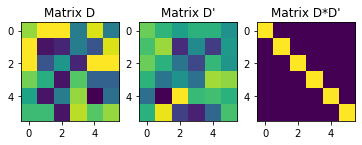

In [18]:
# Compute the inverse
D_inv = np.linalg.inv( D )
print("Dinv = \n{}".format(np.matrix.view(D_inv)))
I_d = D@D_inv
# Fancy plotting from the lecture videos
fig, ax = plt.subplots(1,3)
ax[0].imshow(D)
ax[0].set_title("Matrix D")
ax[1].imshow(D_inv)
ax[1].set_title("Matrix D'")
ax[2].imshow(I_d)
ax[2].set_title("Matrix D*D'")
plt.show()

Dpinv = 
[[ 0.06687521  0.03498862  0.01122535  0.0324796   0.03162369 -0.00373287]
 [ 0.04945821  0.08652332 -0.10439829 -0.01154632 -0.09128302  0.00438002]
 [ 0.06730447  0.03109657 -0.03574145 -0.08022663  0.03832354  0.00026225]
 [ 0.03342162 -0.03555226 -0.00327686 -0.03807433  0.09003047  0.08309119]
 [-0.04046527 -0.13766595  0.12652997  0.04094542  0.04623354  0.03068492]
 [ 0.03077495  0.11914383 -0.08755602 -0.11368348 -0.04854293  0.04934013]]


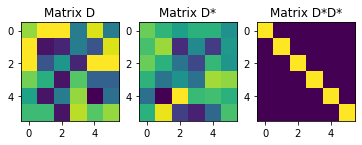

In [19]:
# Compute the pseudoinverse
D_pinv = np.linalg.pinv( D )
print("Dpinv = \n{}".format(np.matrix.view(D_pinv)))
I_pd = D@D_pinv
# Fancy plotting from the lecture videos
fig, ax = plt.subplots(1,3)
ax[0].imshow(D)
ax[0].set_title("Matrix D")
ax[1].imshow(D_pinv)
ax[1].set_title("Matrix D*")
ax[2].imshow(I_pd)
ax[2].set_title("Matrix D*D*")
plt.show()

___
## Code Challenge 117 - Decompose vector to orthogonal components
* vector w, to be decomposed
* vector v, the reference
* compute w-parallel-to-v
* compute v-parallel-to-w
* Confirm results algebraically (sum to w, orthogonal components)
* plot all four vectors

In [26]:
# Initialize the vectors
w = np.array([2.0,3.0])
v = np.array([4.0,0.0])

In [35]:
# Compute the orthogonal components
# --- parallel component is the projection of w on v
# --- --- proj = vTw / vTv * w
# par_w = (v.dot(w) / (w.dot(w))) * w    # --- THIS IS WRONG... It's the REFERENCE that gets all multiplies  
# Also, it looks like the np.dot is better than the v.dot() function... 
par_w = (np.dot(v,w) / (np.dot(v,v))) * v
print("par_w = {}".format(par_w))
# --- perpendicular component is w minus w-parallel
# --- --- perp_w = w - par_w
perp_w = w - par_w
print("perp_w = {}".format(perp_w))

# Check if actually orthogonal... 
print()
print( "Orthogonal? dot={}".format(perp_w.dot(par_w)) )
print( "Orthogonal? sum={}".format(perp_w+par_w) )

par_w = [2. 0.]
perp_w = [0. 3.]

Orthogonal? dot=0.0
Orthogonal? sum=[2. 3.]


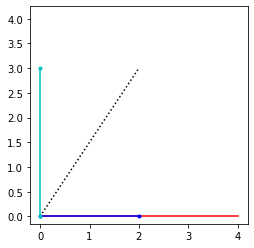

In [36]:
# Plot all four vectors
fig,ax = plt.subplots(1,1,)
ax.plot([0,w[0]],[0,w[1]], ':k',label="w")
ax.plot([0,v[0]],[0,v[1]],'r',label="v")
ax.plot([0,par_w[0]],[0,par_w[1]],".-b",label="par_w")
ax.plot([0,perp_w[0]],[0,perp_w[1]],".-c",label="perp_w")
plt.axis("square")
plt.show()


## Code Challenge 121 - Gram-Schmidt Algorithim 
* Implement the G-S procedure in code
* Start with a square matrix, compute Q
* check Q'*Q = I
* check results against qr()

In [24]:
# --- Square matrix
m = 5
n = 5
A = np.random.randint(-10,10,size=(m,n))
print(A)

[[  1   5  -4   3  -7]
 [ -7  -6   7   2  -5]
 [  6  -2  -1   4   3]
 [ -1   4  -3   3  -8]
 [ -3   3   1   8 -10]]


In [28]:
# --- Implement G-S Algorithim
# --- --- 1st, initialize Q and populate column 0 with A[:,0]
Q = np.zeros((m,n)) 
Q[:,0] = ( A[:,0]/np.linalg.norm(A[:,0]) )

# --- --- 2nd, cycle through each column and create an array
for col in range(1,n,1):
    orig_a = np.array(A[:,col])
    temp = orig_a.copy()
    # --- --- 3rd, subtract the projections on to each column from the original column
    for c in range(col):
        temp_c = np.array(Q[:,c])
        temp = temp - (np.dot(temp_c,orig_a)/np.dot(temp_c,temp_c))*temp_c
    #print("col {col}:\n{ary}".format(col=col,ary=temp))
    # --- --- 4th, normalize and add to Q
    Q[:,col] = temp/np.linalg.norm(temp)

# --- Print Q to check...
np.set_printoptions(precision=3, suppress=True) # Clears away precision errors in zero calculation 
print("Q: ")
print( Q )
print()
# --- check results
print("Q'*Q: ")
print( np.matrix.view(Q.T@Q) )

Q: 
[[ 0.102  0.518 -0.144  0.281 -0.789]
 [-0.714 -0.477 -0.092  0.449 -0.229]
 [ 0.612 -0.366  0.258  0.651  0.023]
 [-0.102  0.459 -0.455  0.515  0.554]
 [-0.306  0.4    0.835  0.177  0.133]]

Q'*Q: 
[[ 1.  0. -0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [-0. -0.  1. -0.  0.]
 [ 0.  0. -0.  1. -0.]
 [ 0.  0.  0. -0.  1.]]


In [30]:
# --- Compare to qr function
QR,R = np.linalg.qr(A)
print("QR: ")
print(QR)
print()

# --- --- Check if equal
print( "Q = QR? : {}".format(Q==QR) )

QR: 
[[-0.102  0.518  0.144 -0.281  0.789]
 [ 0.714 -0.477  0.092 -0.449  0.229]
 [-0.612 -0.366 -0.258 -0.651 -0.023]
 [ 0.102  0.459  0.455 -0.515 -0.554]
 [ 0.306  0.4   -0.835 -0.177 -0.133]]

Q = QR? : [[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]


Comparing the results, it looks like the absolute values are the same but there is a difference in polarity for all except column 1.


---
## Code CHallenge 123: Inverse via QR
The idea behind QR inverse is that it is easier to invert R and take the transpose of Q than take the inverse of A.
A' = (QR)' = R'Q' = R'Q.T 

- Generate a large matrix
- Invert using QR and inv()

In [3]:
# --- Square Matrix
m = 100
A = np.random.randint(-50,50,size=(m,m))

In [24]:
# --- QR equation
Q, R = np.linalg.qr(A)

# --- Invert R and transpose Q
Q_t = Q.T
R_inv = np.linalg.inv(R)  # --- This is typically not what you are supposed to use for large matricies 
A_inv_eq2 = np.linalg.solve(R, Q_t)  # --- This is the better way of doing the inverse multiplication

In [22]:
# --- Compare inverses
A_inv = R_inv@Q_t
A_inv_eq = np.linalg.inv(A)

# --- Check results
I_qr = A_inv@A
I_eq = A_inv_eq@A

<Figure size 432x288 with 0 Axes>

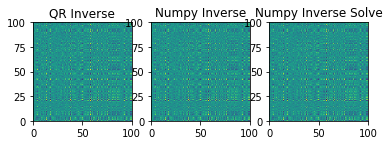

In [25]:
plt.figure()
fig, ax = plt.subplots(1,3)
ax[0].pcolormesh(A_inv)
ax[0].axis('square')
ax[0].set_title("QR Inverse")

ax[1].pcolormesh(A_inv_eq)
ax[1].axis('square')
ax[1].set_title("Numpy Inverse")

ax[2].pcolormesh(A_inv_eq2)
ax[2].axis('square')
ax[2].set_title("Numpy Inverse Solve")
plt.show()

In [27]:
# --- Alternative way to check if they are the same is to check the correlation
# --- --- We use the flatten function to convert the matrix into a vector. Defualt method flattens row-wise 
np.corrcoef( (A_inv.flatten(), A_inv_eq.flatten(), A_inv_eq2.flatten()) )

# --- The matrix below, the lower triangle shows the correlation... if they are 1 then they are the same

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

---
## Code Challenge 124: Prove and demonstrate the Sherman-Morrison inverse 
SM inverse: 
* A = I - abT
* A-1 = I + abT/(1-aTb) 

In [6]:
# --- make two random vectors of equal size
m = 10
a = np.random.randint(-10,10, size=(1,m))
b = np.random.randint(-10,10, size=(1,m))

In [14]:
# --- Make A and A inverse
out = np.dot(b.T,a)
A = np.identity(m) - out
A_inv = np.identity(m) + (out/(1-np.dot(a,b.T)))

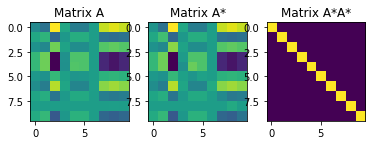

In [16]:
# --- Compare results
results = A@A_inv
# Fancy plotting from the lecture videos
fig, ax = plt.subplots(1,3)
ax[0].imshow(A)
ax[0].set_title("Matrix A")
ax[1].imshow(A_inv)
ax[1].set_title("Matrix A*")
ax[2].imshow(results)
ax[2].set_title("Matrix A*A*")
plt.show()

## Code Challenge 134: Least-Squares via QR decomposition
* Generate random data (design matrix X, data y)
* Solve for betat using QR decomposition
* Compare the QR results against the "standard" left-inverse method

In [14]:
# Generate Tall matrix X of data
m = 50
n = 3 
X = np.random.randint(-10,10, size=(m,n))

# Generate Vector y of results
y = np.random.randint(-10,10, size=(m,1))

In [15]:
# Solve for beta using QR decomposition
#   1. QR = X
#   2. beta = (R^TR)-1(R^TR)y
# --------------------
# 1 -
[Q,R] = np.linalg.qr(X)

# 2 -
left = np.linalg.inv(R.T@R)
right = (Q@R)
beta = left@right.T@y
## BETTER WAY OF DOING IT!!!!!!!!!!!
beta1 = np.linalg.solve(R.T@R,(Q@R).T@y)

In [20]:
# Solve least squares with normal left invers
beta_li = np.linalg.inv(X.T@X)@X.T@y
## BETTER WAY OF DOING IT!!!!!!!!!!!
beta_li1 = np.linalg.solve(X.T@X,X.T@y)
### ACTUAL LEAST SQUARES CODE...
beta_ls = np.linalg.lstsq(X,y,rcond=None)[0]

[[ 0.00000000e+00]
 [-2.77555756e-17]
 [-4.16333634e-17]]


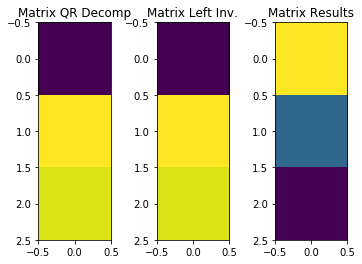

In [21]:
# --- Compare results
results = beta1 - beta_ls
print(results)
# Fancy plotting from the lecture videos
fig, ax = plt.subplots(1,3)
ax[0].imshow(beta)
ax[0].set_title("Matrix QR Decomp")
ax[1].imshow(beta_li)
ax[1].set_title("Matrix Left Inv.")
ax[2].imshow(results)
ax[2].set_title("Matrix Results")
plt.show()

## Code Challenge 140 - Eignevalues of diagonal and triangular matrices
* generate diagonal matrix (2x2), then compute the Eignevalues
* Increase the size of the matrices and run again

In [17]:
# -- Creating (2x2) diagonal matrix
# --- Create 2 (4x4)
A = np.random.randint( -10, 10, size=(2,2) )
B = np.random.randint( -10, 10, size=(2,2) )

# --- Diagnolize 
B = np.diag( np.matrix.diagonal( B ) )
A = np.diag( np.matrix.diagonal( A ) )
print( A )
print()
print( B )

[[-3  0]
 [ 0 -8]]

[[ 4  0]
 [ 0 -5]]


In [18]:
# -- Compute Eigenvalues
A_e_vals = np.linalg.eigvals(A)
B_e_vals = np.linalg.eigvals(B)
print(A_e_vals)
print()
print(B_e_vals)

[-3. -8.]

[ 4. -5.]


In [19]:
# --- Create 2 (4x4)
Ax = np.random.randint( 3, 10 ) 
A = np.random.randint( -10, 10, size=(Ax,Ax) )
Bx = np.random.randint( 3, 10 ) 
B = np.random.randint( -10, 10, size=(Bx,Bx) )

# --- Diagnolize 
B = np.diag( np.matrix.diagonal( B ) )
A = np.diag( np.matrix.diagonal( A ) )
print( A )
print()
print( B )

[[-1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0 -6  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  0 -5  0]
 [ 0  0  0  0  0 -4]]

[[-10   0   0   0   0   0   0]
 [  0   8   0   0   0   0   0]
 [  0   0   1   0   0   0   0]
 [  0   0   0  -2   0   0   0]
 [  0   0   0   0   6   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  -1]]


In [21]:
# -- Compute Eigenvalues
A_e_vals = np.linalg.eigvals(A)
B_e_vals = np.linalg.eigvals(B)
print(A_e_vals)
print()
print(B_e_vals)

[-1.  4. -6.  6. -5. -4.]

[-10.   8.   1.  -2.   6.   0.  -1.]


In [25]:
# --- Create 2 Matrix
Cx = np.random.randint( 3, 10 ) 
C = np.random.randint( -10, 10, size=(Cx,Cx) )
Dx = np.random.randint( 3, 10 ) 
D = np.random.randint( -10, 10, size=(Dx,Dx) )

# --- Upper Triangle Matrix 
C = np.triu( C )
D = np.triu( D )
print( C )
print()
print( D )

[[ -3   8   0   5  -5   2]
 [  0   8   5  -5  -6  -7]
 [  0   0   8  -9  -3 -10]
 [  0   0   0  -1   1   9]
 [  0   0   0   0  -9   4]
 [  0   0   0   0   0 -10]]

[[-3  2 -3  6]
 [ 0  8  2 -6]
 [ 0  0 -1  4]
 [ 0  0  0  8]]


In [26]:
# -- Compute Eigenvalues
C_e_vals = np.linalg.eigvals(C)
D_e_vals = np.linalg.eigvals(D)
print(C_e_vals)
print()
print(D_e_vals)

[ -3.   8.   8.  -1.  -9. -10.]

[-3.  8. -1.  8.]


In [2]:
# --- Create 2 Matrix
Ex = np.random.randint( 3, 10 ) 
E = np.random.randint( -10, 10, size=(Ex,Ex) )
Fx = np.random.randint( 3, 10 ) 
F = np.random.randint( -10, 10, size=(Fx,Fx) )

# --- Upper Triangle Matrix 
E = np.tril( E )
F = np.tril( F )
print( E )
print()
print( F )

[[  0   0   0]
 [ -7 -10   0]
 [  3   7  -2]]

[[  1   0   0   0   0   0   0   0   0]
 [ -2   0   0   0   0   0   0   0   0]
 [  6  -7   5   0   0   0   0   0   0]
 [  5 -10  -6   7   0   0   0   0   0]
 [ -1  -7   3   6  -7   0   0   0   0]
 [-10   8  -1  -3  -8   1   0   0   0]
 [-10  -8   4  -1  -9  -4   5   0   0]
 [ -5   2   1  -2   5   9  -5  -9   0]
 [ -1 -10   1  -1  -6  -2 -10 -10   8]]


In [3]:
# -- Compute Eigenvalues
E_e_vals = np.linalg.eigvals(E)
F_e_vals = np.linalg.eigvals(F)
print(E_e_vals)
print()
print(F_e_vals)

[ -2. -10.   0.]

[ 8. -9.  5.  1. -7.  7.  5.  0.  1.]


## Code Challenge 141
1. Generate a large (40x40) matrix of random values and extract the eigenvalues.  Then plot the results
2. Repeat the process many times and plot the results.

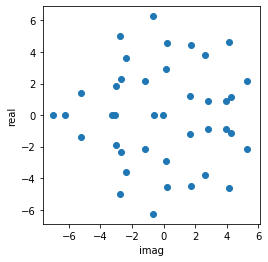

In [11]:
# -- Create Random Matrix
# ------ Initially I used rand(40,40), but this produces an array and a matrix of random numbers which was weird 
A = np.random.randn(40,40)
# -- Extract Eigenvalues
# ------ The results from the video used eig and took the first returned value... I was using eigvals before, not sure difference
e_vals = np.linalg.eig( A )[0]
# -- plot results 
plt.figure()
# ----------- The eigenvalues are complex, and the goal is to plot them on the complex plan
plt.plot( np.real(e_vals), np.imag(e_vals), 'o' )
plt.ylabel('real')
plt.xlabel('imag')
plt.axis('square')
plt.show()

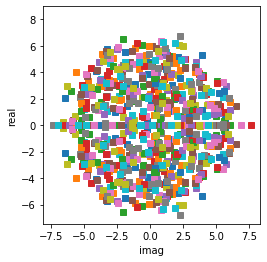

In [16]:
# -- Repeat random matricies and plot results
e_values_list = []
# shape_list = [] # This was unnecessary... goal was to look at one size
for i in range(20):
    #s = np.random.randint(10, 100)
    #B = np.random.rand( s, s )
    B = np.random.randn( 40, 40 )
    evals = np.linalg.eig( B )[0]
    e_values_list.append( evals )
    #shape_list.append( s )

# --- Plot Results 
plt.figure()
#for e,sh in zip(e_values_list, shape_list):
for e in e_values_list:
    plt.plot( np.real(e),np.imag(e),'s' )
plt.ylabel('real')
plt.xlabel('imag')
plt.axis('square')
plt.show()


## Code Challenge 142
Prove that: <br>

(A-B)v = lambda v <br>

(A^2 - AB + BA + B^2)v = lambda^2 v

In [35]:
# --- First create the random Matrices 
size = 4
A = np.random.randint(-10, 10, size=(size,size))
B = np.random.randint(-10, 10, size=(size,size))

# --- --- Make symetric
A = A@A.T
B = B@B.T

# --- Print
#print("A:\n{}".format(A))
#print("B:\n{}".format(B))

In [36]:
# --- Compute eigenvectors and eigenvalues
eig_val1, eig_vec1 = np.linalg.eig( (A-B) )
eig_val2, eig_vec2 = np.linalg.eig( (A@A-A@B-B@A+B@B) )

# --- Compare...
print( "l1: \n{}".format( eig_val1 ) )
print( "l2: \n{}".format( eig_val2 ) )
print( "l1^2: \n{}".format( eig_val1**2 ) )

l1: 
[ 318.51936671 -133.24095689 -174.92347151  109.6450617 ]
l2: 
[101454.58696675  30598.22088546  17753.15259335  12022.03955444]
l1^2: 
[101454.58696675  17753.15259335  30598.22088546  12022.03955444]


In [28]:
# ---
""" My issue from my first attemp shown below is that I did not sort 
    the eigen values and the eigen vectors w.r.t. each other. This was
    resulting in the diagonal being correct but not the full matrix
""" 
print( "(A-B)^2*v: \n{}".format( (A@A-A@B-B@A+B@B)@eig_vec ) )
print( "l^2*v: \n{}".format( (eig_val2@eig_vec) ) )

(A-B)*v: 
[[ 35456.73174394  28098.36303042   -455.15813378    266.52039705]
 [ 10476.83067342 -46818.16676373   -198.42969482  -1777.16025732]
 [-36517.18332613 -23014.66168403   -385.63937505   1117.38299975]
 [ 32176.96607251 -41837.4041748     128.50404845   1553.05955843]]
l*v: 
[[ 35456.73174394  23676.54315622 -43353.56657637   6206.07556715]
 [ 12433.47855841 -46818.16676373 -22430.13630322 -49110.67747305]
 [  -383.38467457   -203.60073754   -385.63937505    273.16568594]
 [  1381.8423061   -1513.96347586    525.64522751   1553.05955843]]


In [38]:
# --- From solutions video... 
# --- --- Sort
sidx1 = np.argsort( abs(eig_val1) )
sidx2 = np.argsort( eig_val2 )

# --- --- --- Sort Vect
eig_vec1 = eig_vec1[ sidx1 ]
eig_vec2 = eig_vec2[ sidx2 ]

"""# --- --- --- Sort Vals
eig_val1 = eig_val1[ :,sidx1 ]
eig_val2 = eig_val2[ :,sidx2 ]"""

print( "l1^2v1 - l2v2: \n{}".format( ( (eig_vec1)-(eig_vec2) ) ) )

l1^2v1 - l2v2: 
[[-3.33066907e-16  4.62406892e-01 -4.62406892e-01 -2.24572738e-01]
 [-3.46944695e-16 -7.44894516e-01  7.44894516e-01  1.52033264e+00]
 [-1.11022302e-16 -8.02928841e-01  8.02928841e-01 -1.24098309e+00]
 [-1.11022302e-16  7.65909461e-01 -7.65909461e-01  3.13235864e-01]]


## Code Challenge 142: Reconstruct a matrix from eigenlayers
1. Create an MxM symmetric matrix, take it's eigendecomposition
2. Compute the norm of the outer product of v_i (where v_i is an eigenvector)
3. create one layer of A as lambda * v * v', then compute the norm
4. reconstruct A by summing over the eigenlayers (outer products)

In [29]:
# --- Step 1
# --- --- make the matrix
m = 4
A = np.random.randint(-10,10,size=(m,m))
# --- --- make it symmetric
A = A@A.T
# --- --- do eigendecomposition
eig_val, eig_vec = np.linalg.eig( A )

In [30]:
# --- Step 2 
# --- --- Sort? Taking this from the last code challenge
#sidx = np.argsort( eig_val )
#eig_vec = eig_vec[ sidx ]  
# - Doing all of that actually created an error
# --- --- create outer product and compute norm
outers = []
for i in range(m):
    v = eig_vec[:,i]            # --- Got from solutions video, this makes a column matrix
    tmp = np.outer( v, v )
    outers.append( tmp )
    print("Norm of outer = {}".format( np.linalg.norm(tmp) ))

Norm of outer = 0.9999999999999998
Norm of outer = 1.0000000000000002
Norm of outer = 1.0
Norm of outer = 0.9999999999999999


In [31]:
# --- Step 3
# --- --- Create the eigen layers and compute norm
eigen_layers = []
for o,l in zip( outers, eig_val):
    tmp = l*o@o.T
    eigen_layers.append( tmp )
    print("Norm of {} layer = {}".format( l, np.linalg.norm(tmp) ))

Norm of 232.87038975269712 layer = 232.870389752697
Norm of 0.2943213611989748 layer = 0.29432136119897484
Norm of 135.82575748858062 layer = 135.82575748858062
Norm of 87.00953139752338 layer = 87.00953139752338


In [32]:
# --- Step 4
# --- --- Sum over layers
A_el = np.zeros(shape=(m,m))
for e in eigen_layers:
    A_el += e
# --- --- Compare to A
print( "A: \n{}".format(A) )
print( "A_el: \n{}".format(A_el) )

A: 
[[141  62  24   9]
 [ 62  69   8  78]
 [ 24   8  96  36]
 [  9  78  36 150]]
A_el: 
[[141.  62.  24.   9.]
 [ 62.  69.   8.  78.]
 [ 24.   8.  96.  36.]
 [  9.  78.  36. 150.]]


## Code Challenge 144: Trace and Determinant
Verify the following for both a full rank a not-full rank matrix:
1. trace( A ) = sum( eigen_vals(A) )
2. det( A ) = product( eigen_vals(A) )

In [16]:
# --- Create a square matrix
m = 5
n = 7
A = np.random.randint( -10, 10, size=(m,m) ) # Full Rank
B = np.random.randint( -10, 10, size=(n,m) ) @ np.random.randint( -10, 10, size=(m,n) ) # not-full rank
print("Rank A: {}\nRank B: {}".format(np.linalg.matrix_rank(A), np.linalg.matrix_rank(B) ) )

# --- Get eigen values
eig_val, eig_vec = np.linalg.eig( A )
eig_val_b, __ = np.linalg.eig( B )

Rank A: 5
Rank B: 5


In [15]:
# --- Compare to the Trace
trace_a = np.matrix.trace(A)
sum_eig_a = np.sum( eig_val )
trace_b = np.matrix.trace(B)
sum_eig_b = np.sum( eig_val_b )
print("A: trace - sum: {}".format( trace_a - sum_eig_a ))
print("B: trace - sum: {}".format( trace_b - sum_eig_b ))

A: trace - sum: (-2.3092638912203256e-14-4.440892098500626e-16j)
B: trace - sum: (-2.1316282072803006e-13+0j)


In [17]:
# --- Compare to the determinat
det_a = np.linalg.det( A )
prod_eig_a = np.prod( eig_val )
print("det - prod: {}".format( det_a - prod_eig_a ))
det_b = np.linalg.det( B )
prod_eig_b = np.prod( eig_val_b )
print("det - prod: {}".format( det_b - prod_eig_b ))

det - prod: (1.8917489796876907e-10+2.6447778438152545e-12j)
det - prod: (1.0147574923062633e-17+0j)


## Code Challenge 146: Generalize Eigendecomposion
Goal: Compare GED( S, R ) with eig( inv(R)*S )
1. GED on 2x2 matrix. Plot eigenvectors
2. Use real data matrices. Plot eigenvalues

In [83]:
# --- Import the scipy library to get the GED function
from scipy.linalg import eig, eigh
from scipy.io import loadmat

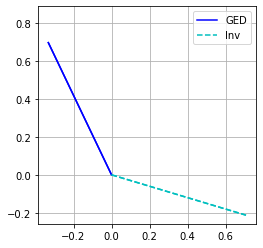

In [82]:
# --- Make 2x2 matrix
S = np.random.randint( -10, 10, size=(2,2))
R = np.random.randint( -10, 10, size=(2,2))

# --- Run the GED equaltion
eig_vals_ged, eig_vec_ged = eig( S, R )
eig_vals_inv, eig_vec_inv = eig( np.linalg.inv(R)@S )

plt.figure()
#for v in eig_vec:
plt.plot([0,eig_vec_ged[0,0]], [0,eig_vec_ged[1,0]], 'b', label='GED')
plt.plot([0,eig_vec_ged[0,1]], [0,eig_vec_ged[1,1]], 'b')
plt.plot([0,eig_vec_inv[0,0]], [0,eig_vec_inv[1,0]], "c--", label='Inv')
plt.plot([0,eig_vec_inv[0,1]], [0,eig_vec_inv[1,1]], "c--")
plt.grid(axis='both',which='both')
plt.axis("square")
plt.legend()
plt.show()

In [85]:
# --- import real data values
path = "C:/Users/mpaniccia/OneDrive - Brookhaven National Laboratory/Home/Class_Stuff/Linear Algebra/linalg_eig/"
filename = "real_matrices.mat"
data = loadmat( path+filename )

In [86]:
S = data["S"]
R = data["R"]

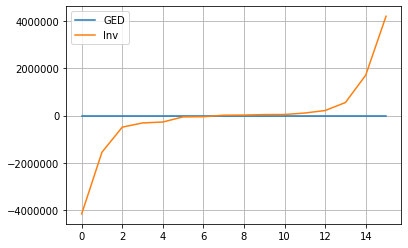

In [87]:
# --- GED 
# Use the eigh function for symetric matrices, which this data is...
# --- Run the GED equaltion
eig_vals_ged, eig_vec_ged = eigh( S, R )
eig_vals_inv, eig_vec_inv = eigh( np.linalg.inv(R)@S )

plt.figure()
#for v in eig_vec:
plt.plot(eig_vals_ged, label='GED')
plt.plot(eig_vals_inv, label='Inv')
plt.grid(axis='both',which='both')
plt.legend()
plt.show()

## Code Challenge 148 - Eigendecomposition vs SVD For Square Matricies
How does the SVD compare to eigendecomposition on Square matricies 
* Create a 5x5 Symetric Matrix
* Run eigendecomposion on the matrix, store Vectors in W and Values in L
* Run SVD on the matrix, store the left-singular matrix in U, Values in S, and right-singular matrix in V
* Create an image of all matrices
* Compare U and V
* Compare U and W 

In [2]:
# --- 5x5 Matrix
m = n = 5
A = np.random.randint(-10, 10, size=(m,n))
A = A@A.T

In [3]:
# --- eigen 
L, W = np.linalg.eig( A )
# --- --- From video, we need to sort 
sidx = np.argsort(L)[::-1]
L = L[sidx]
W = W[:,sidx]
# --- svd 
U, S, V = np.linalg.svd( A )
# --- --- From video, the V matrix is transposed 

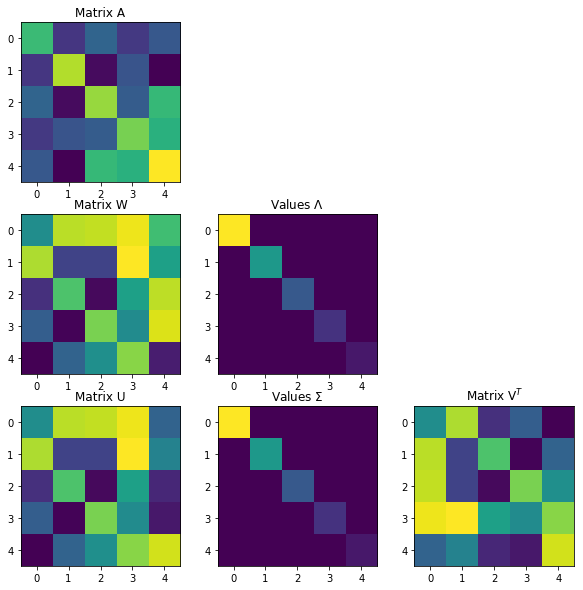

In [6]:
# --- plot images of each Matrix
fig, (a1, a2, a3) = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
# --- A
a1[0].imshow(A)
a1[0].set_title( "Matrix A")
a1[1].axis('off')
a1[2].axis('off')
# --- Eigen
a2[0].imshow(W)
a2[0].set_title( "Matrix W")
a2[1].imshow(np.diag(L))
a2[1].set_title( "Values $\Lambda$")
a2[2].axis('off')
# --- SVD
a3[0].imshow(U)
a3[0].set_title( "Matrix U")
a3[1].imshow(np.diag(S))
a3[1].set_title( "Values $\Sigma$")
a3[2].imshow(V)
a3[2].set_title( "Matrix V$^T$")
plt.show()

In [7]:
# -- Compare U and V 
# --- --- Remember, V is actually V-transpose
with np.printoptions(precision=3):
    print( "Compare U and V:\n {}".format(U-V.T))

Compare U and V:
 [[-1.561e-16  1.110e-16 -3.331e-16 -2.220e-16 -2.776e-17]
 [ 2.220e-16 -1.110e-16  1.110e-16  2.220e-16 -1.388e-17]
 [ 4.441e-16  0.000e+00  1.110e-16  1.388e-16 -1.110e-16]
 [ 2.220e-16  1.110e-16 -5.551e-17 -2.533e-16 -1.110e-16]
 [ 4.441e-16  1.943e-16  8.674e-18 -2.776e-16  2.220e-16]]


The results show they are the same. Which, makes sense because it's a square matrix

In [8]:
# -- Compare U and W 
with np.printoptions(precision=3):
    print( "Compare U and W:\n {}".format(U-W) )

Compare U and W:
 [[ 4.788e-16  3.331e-16  5.551e-16  0.000e+00 -4.958e-01]
 [-4.996e-16 -3.331e-16  6.106e-16  0.000e+00 -1.679e-01]
 [ 6.106e-16 -3.886e-16  0.000e+00 -5.551e-16 -1.048e+00]
 [-3.331e-16  0.000e+00 -4.996e-16 -2.671e-16 -1.167e+00]
 [ 1.110e-16  6.939e-16  2.776e-17  0.000e+00  1.125e+00]]


There is a non-zero column(s)... This is because the singular value and eigen value have oposite signs.  If we invert the operation (U+W) the column that was non-zero will go zero and the others will become non-zero.

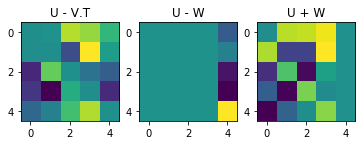

In [9]:
fig, (a1, a2, a3) = plt.subplots(nrows=1, ncols=3)
a1.imshow( U-V )
a1.set_title( "U - V.T" )
a2.imshow( U-W )
a2.set_title( "U - W" )
a3.imshow( U+W )
a3.set_title( "U + W" )
plt.show()